# What is a Neural Network?

A neural network is... a network of neurons.
So let's first understand how a single neuron works, before understanding how the network works.

Honestly, we could stop all the theory here by saying the most important thing in AI:
> **A neuron is just a linear function.**

At the beginning of your AI journey, when you are building your first deep learning models, many of your questions can be answered by remembering:
 **A neuron is a linear function. Always keep that in mind.**

However, the mathematical model of a neuron is slightly different — and that's where confusion often comes from.

So here’s the second most important thing to know about AI:
> **The architecture of an artificial neuron model is always the same. Always.**

Here’s the architecture:

- A mathematical model that processes the input data
- An activation function
- A performance measurement
- An optimization process to improve performance

This structure is always the same for every neuron (and therefore every neural network).
What changes is the content: the choice of mathematical models for (1), (2), (3), and (4).

To really understand this, let’s walk through an example!


# Example: A Simple Binary Classification Problem

We will look at how the math behind this architecture works by taking a binary classification model. Don't be afraid of the terms, they will make sense later. What you need to understand is that this model allows for linearly separating two classes.

Suppose we have two types of plants:
- Toxic plants (labeled $y = 1$)
- Non-toxic plants (labeled $y = 0$)

We decide to measure two features:
- $x_1$: the length of the leaves
- $x_2$: the width of the leaves

If we plot these measurements, we observe that the two types of plants can be linearly separated.

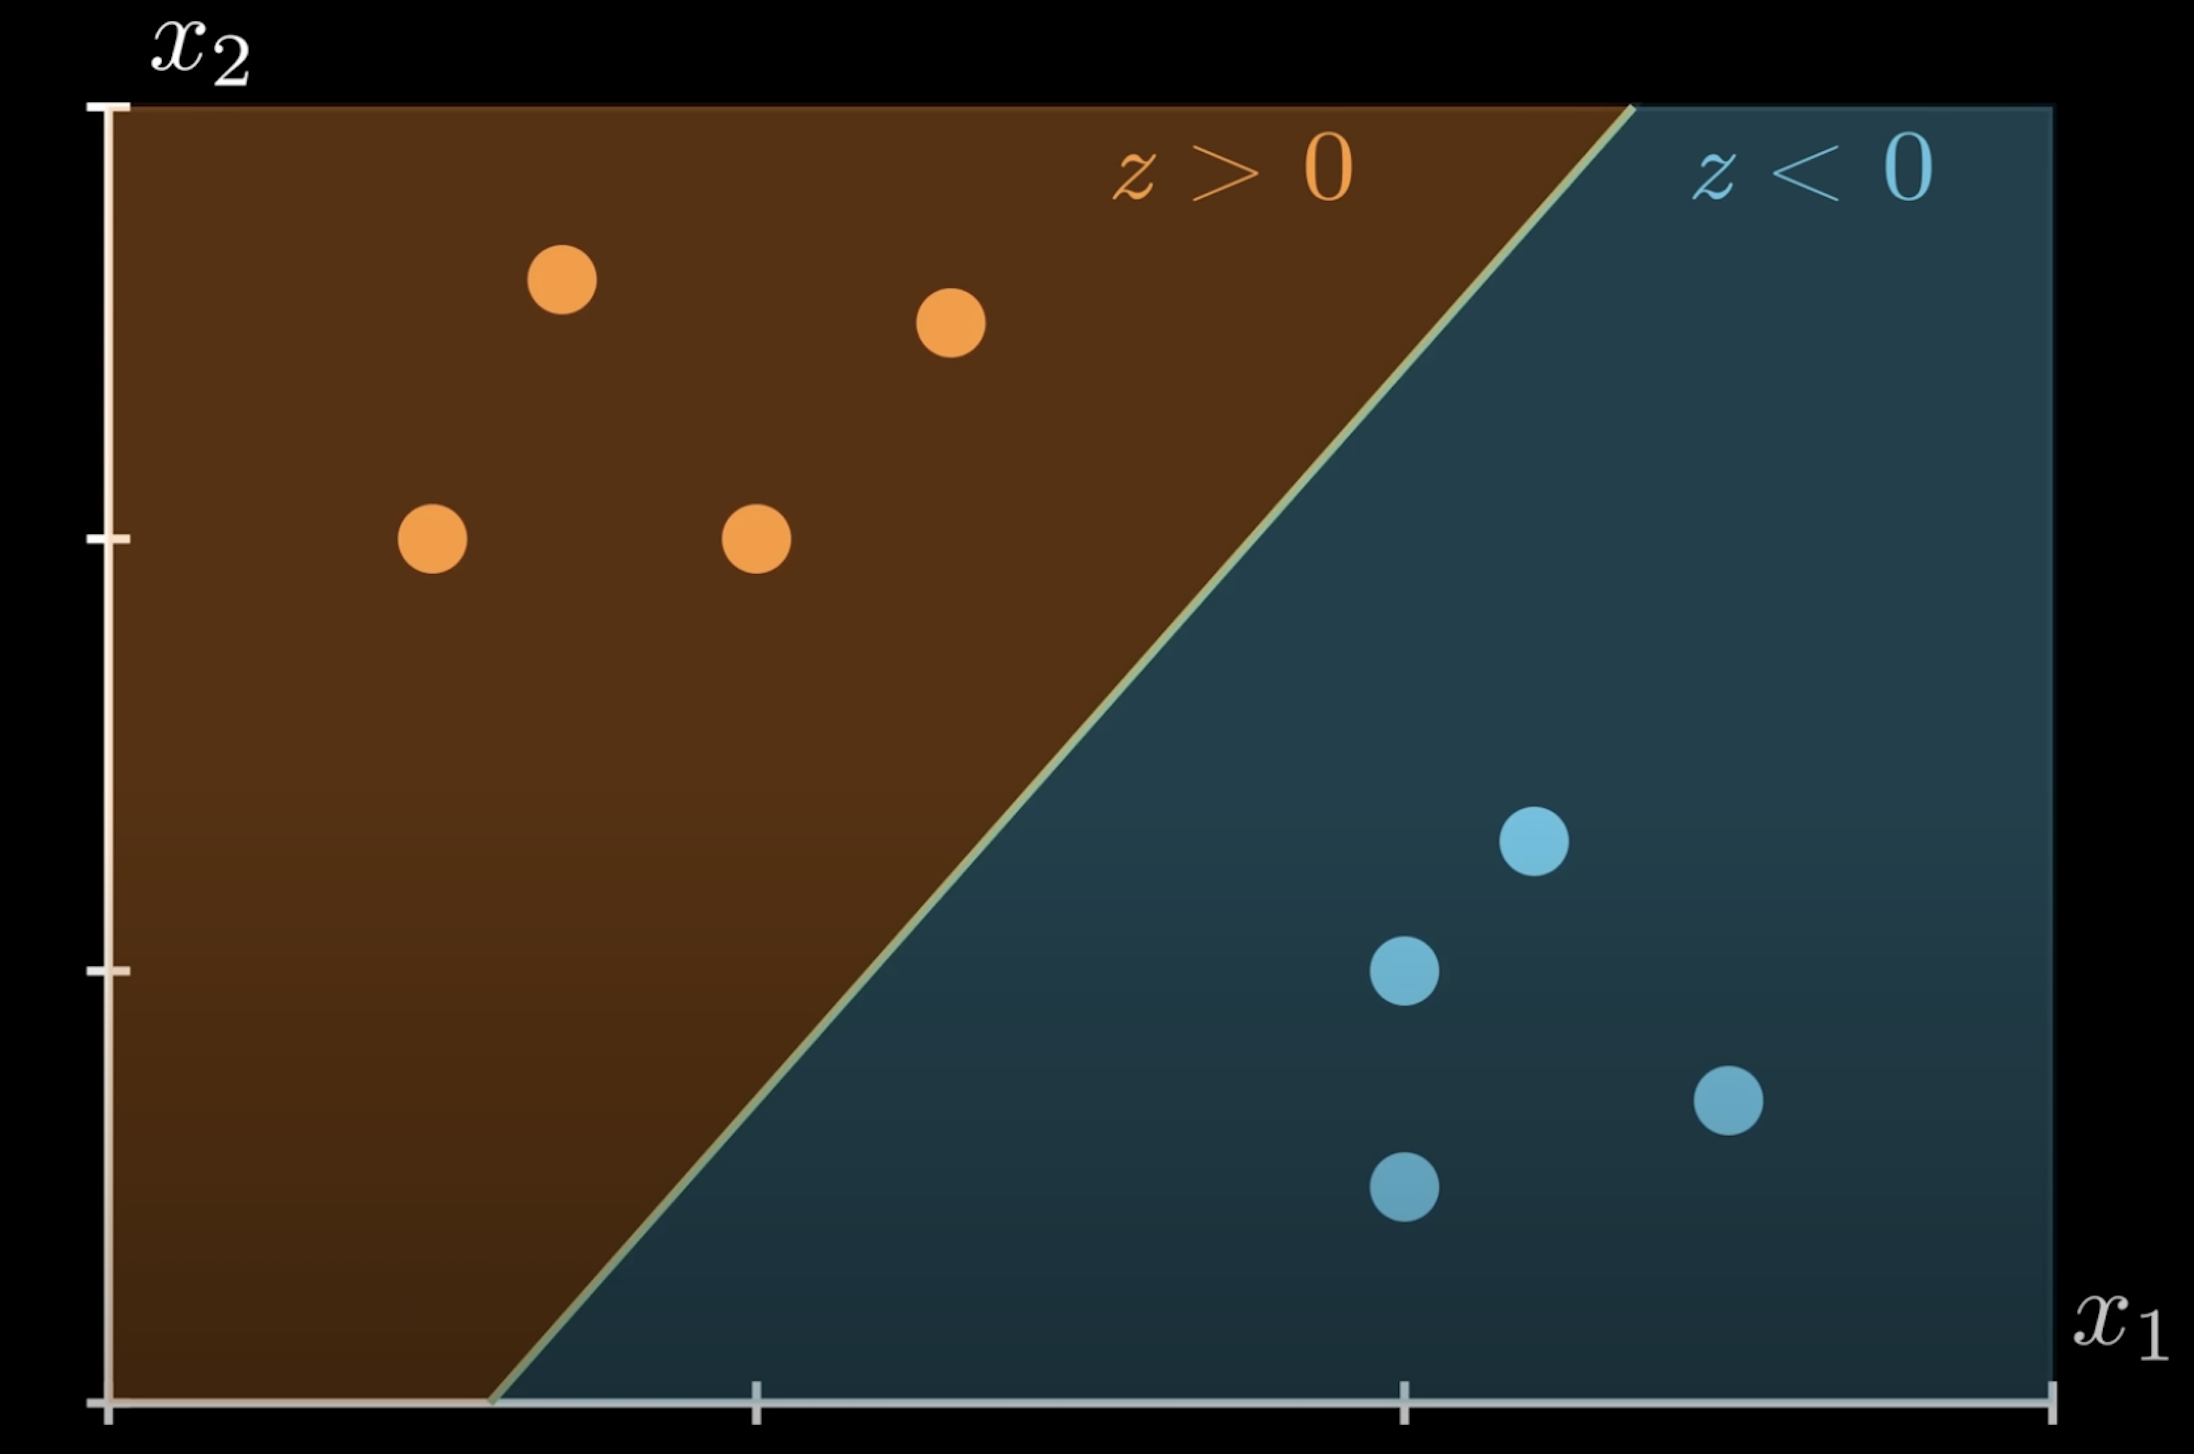

In [10]:
from IPython.display import Image, display

display(Image("/Users/pierrechambet/Desktop/graph_1.png", width=600, height=400))

To find the equation of the decision boundary (the line), we build a linear model:
each input $x$ is multiplied by a weight $w$, and we add a bias term $b$.

Here’s how a neuron looks:

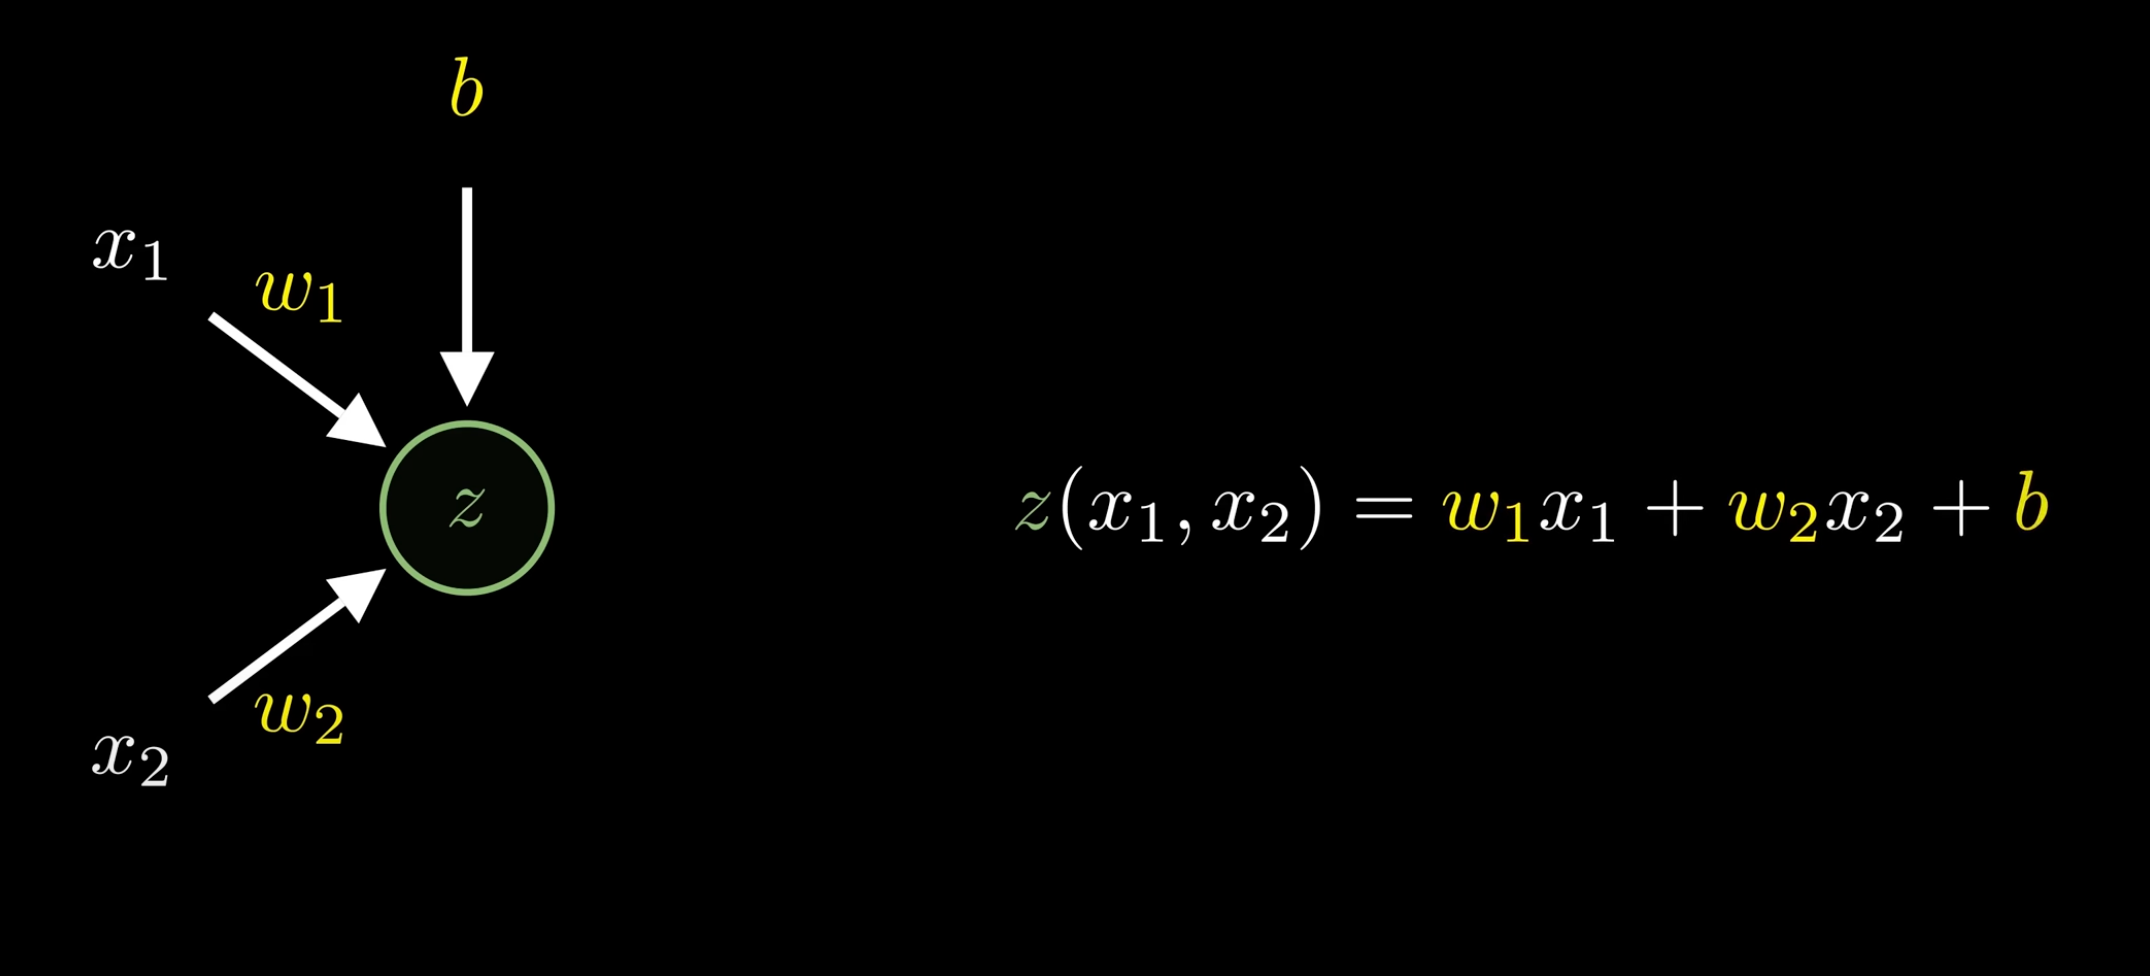

In [11]:
from IPython.display import Image, display

display(Image("/Users/pierrechambet/Desktop/neurone.png", width=600, height=400))


# How Does This Neuron Work?

To predict the plant class, we need to adjust the parameters $w$ and $b$ so that the neuron separates the two groups as accurately as possible.

This is exactly how the first neuron in history (the Perceptron) worked, developed by Rosenblatt in 1958.

# Adding a Sense of Probability: Activation Functions

However, we would also like to have a probability associated with each prediction. Indeed, the further a plant is from the decision boundary, the more confident we want to be about its classification. To achieve this, we use an activation function that "activates" the neuron based on a rule, criterion defined by that function. 

For example, we can use the **sigmoid function**. A common choice which maps any output to a probability between 0 and 1.\
If the probability is greater than 0.5, we classify the plant into **Class 1** (e.g., toxic). Otherwise, we classify it into **Class 0** (e.g., non-toxic).\
This gives us a **binary classification model** that predicts which class a plant belongs to based on its attributes.

While the sigmoid function is commonly used, other activation functions like **ReLU** or **tanh** can also be used. However, the principle remains the same: we apply an activation function to the neuron's output to obtain a probability.

This approach allows us to make more probabilistic predictions, giving us not just the predicted class, but also the certainty (probability) of that prediction.


The sigmoid function is:

$$
a(z) = \frac{1}{1 + e^{-z}}
$$
where **z** is the output of the neuron and e the exponential function.

# Graph of the Sigmoid Function

Let's visualize the sigmoid function and highlight a specific point. \
Imagine we have a plant that lies in the orange zone of the graph above. The output of the neuron will be positive. Let's assume that its output value is $z = 1.5$. By applying the sigmoid function, we get the following result. \
The plant is positioned here on the sigmoid function graph:


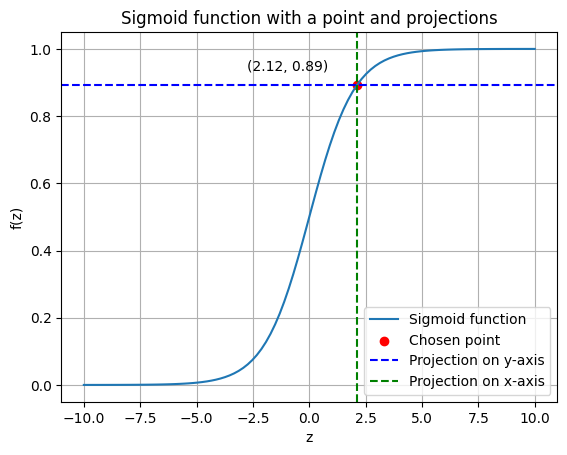

In [12]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-z))

# Pick a specific point on the curve
point_index = 60  
x_point = z[point_index]
y_point = y[point_index]

# Plot the sigmoid curve
plt.plot(z, y, label='Sigmoid function')

# Highlight the chosen point
plt.scatter([x_point], [y_point], color='red', label='Chosen point')

# Add projections on the axes
plt.axhline(y=y_point, color='blue', linestyle='--', label='Projection on y-axis')
plt.axvline(x=x_point, color='green', linestyle='--', label='Projection on x-axis')

# Add annotations
plt.annotate(f'({x_point:.2f}, {y_point:.2f})', (x_point, y_point), textcoords="offset points", xytext=(-50,10), ha='center')

# Graph details
plt.title('Sigmoid function with a point and projections')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.legend()
plt.grid()
plt.show()

# Interpretation

Suppose our plant has a neuron output $z$ = 1.5.

Applying the sigmoid function, we get a probability of 0.89.

This means our model predicts there's an 89% chance that the plant belongs to class 1.
It's a pretty high probability, which makes sense since the plant is in the orange zone, where we expect to find toxic plants.

Thus, it also predicts a 11% chance that the plant is non-toxic (class 0).

In general:

- Probability of being in class 1: $a(z)$
- Probability of being in class 0: $1 - a(z)$

Mathematically:

$$P(Y=1) = a(z)$$ 
$$P(Y=0) = 1 - a(z)$$

# A Bernoulli Distribution!

Take a closer look : Each plant’s classification follows a Bernoulli distribution with parameter $a(z)$.

$$
P(Y=y) = a(z)^y \cdot (1 - a(z))^{1-y} \quad \text{where} \quad y \in \{0, 1\}
$$


Indeed, if $y = 1$, we have:
$$
P(Y=1) = a(z)^1 \cdot (1 - a(z))^{1-1} = a(z)$$
If $y = 0$, we have:
$$
P(Y=0) = a(z)^0 \cdot (1 - a(z))^{1-0} = 1 - a(z)$$
This means that the output of our neuron is a Bernoulli distribution with parameter $a(z)$.

# How to Evaluate the Model?

Now that we have a working model, we need to evaluate its performance. How good is the model at making correct predictions?

How to do it ? Adjusting the parameters $w$ and $b$ to minimize errors between the model output and the real labels.

We need to define a **loss function** that quantifies the difference between the predicted probabilities and the true labels.

We calculate the **likelihood**. Likelihood tells us how plausible our model's predictions are given the data we consider as true.

For example, if a plant is toxic and the model returns a probability of toxicity equal to 89%, then it is itself plausible at 89%.

To calculate the likelihood of our model, we simply multiply the probabilities associated with each plant.

Since these probabilities follow a Bernoulli distribution, we can write the likelihood $L(W,b)$ of our model as follows:

$$
L(W, b) = \prod_{i=1}^{N} P(Y = y_i) = \prod_{i=1}^{N} a(z_i)^{y_i} \cdot (1 - a(z_i))^{1-y_i}
$$
where:
- $N$ = number of plants
- $y_i$ = true label for plant $i$
- $z_i$ = output for plant $i$

# Problem: Likelihood Gets Tiny!

But we have a problem: likelihood is a product of probabilities that are between 0 and 1. If we have many plants, this product will be very small and therefore difficult to handle.\
As $N$ increases, the product of small numbers becomes extremely small:
$$ \lim_{N \to \infty} L(W,b) = 0 $$

This is hard to work with numerically.

# Solution: Log-Likelihood!

Instead of working with products, we work with sums by taking the logarithm:

$$
\log L(W, b) = \sum_{i=1}^{N} \left( y_i \cdot \log(a(z_i)) + (1 - y_i) \cdot \log(1 - a(z_i)) \right)
$$

# Defining the Cost Function: Log-Loss

This likelihood function is called the cost function. It allows us to quantify the error between the model's predictions and the true data. The higher the likelihood, the better the model's performance.

Therefore, we need to maximize this likelihood to obtain the best possible model.

But in data science, we never aim to maximize; we aim to minimize. So, we take the opposite approach.

We add a negative sign and a factor of $1/N$ normalize the cost function so that it falls between 0 and 1. Nothing more.

We will define the **log-loss function** as follows:

$$
\text{Log-loss} = - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot \log(a(z_i)) + (1 - y_i) \cdot \log(1 - a(z_i)) \right)
$$

Where:

- $N$ = Number of plants
- $y_i$ = True label for plant $i$
- $a(z_i)$ = Predicted probability for plant $i$ to be toxic or not


# How to Minimize the Cost? Gradient Descent!

Now that we have a cost function, we need to minimize it.

We use the **Gradient Descent** algorithm — one of the most important algorithms in machine learning and deep learning.

Gradient Descent adjusts the parameters $w$ and $b$ to minimize the Log-Loss.

But first, we need to know: How does the Log-Loss change when we slightly change $w$ or $b$? That way we can adjust them in the right direction.

Answer: we calculate the **gradient** (the derivative).

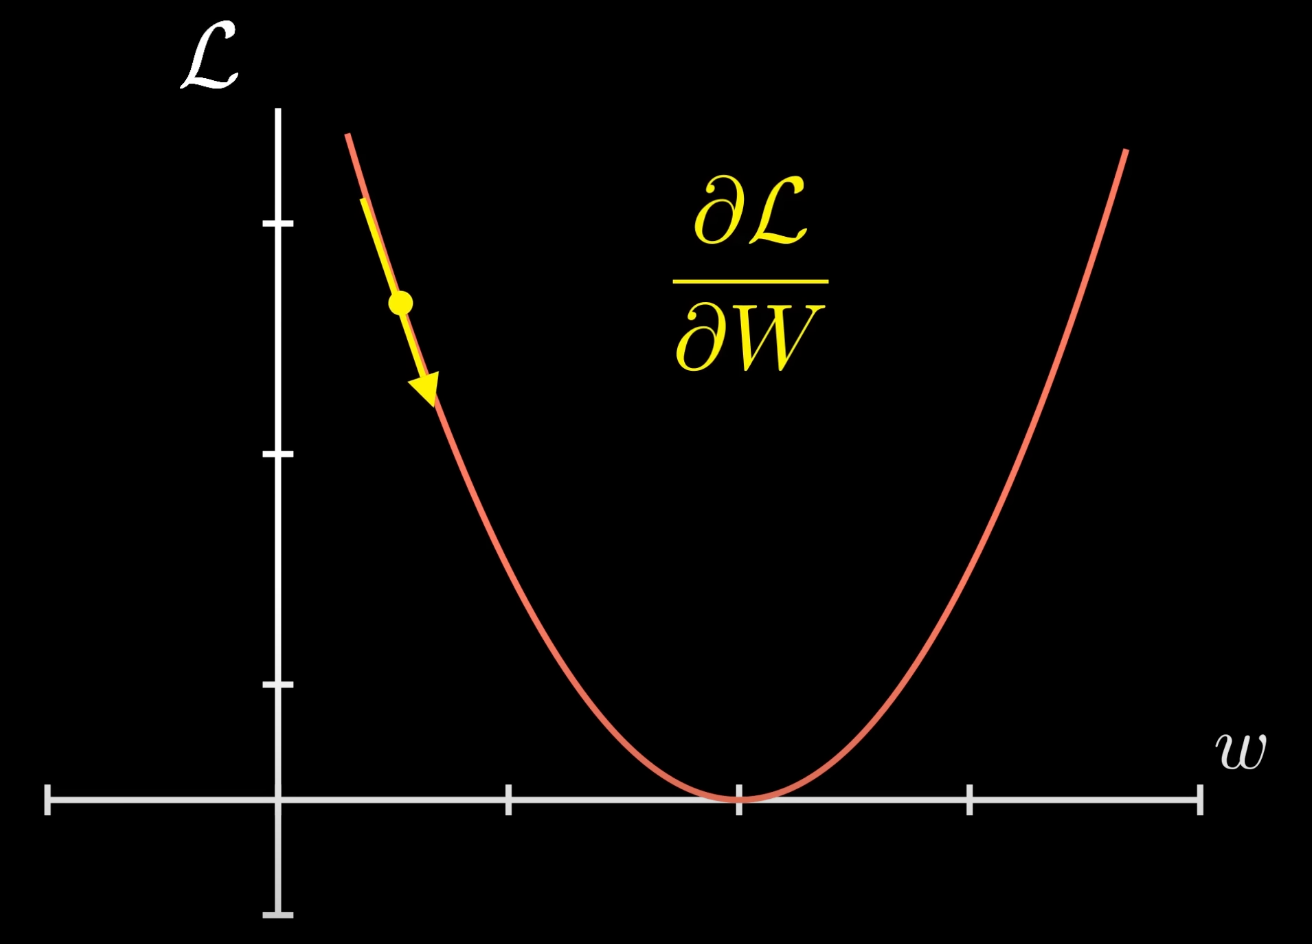

In [13]:
from IPython.display import Image, display

display(Image("/Users/pierrechambet/Desktop/gradient.png", width=400, height=300))

The derivative of a function indicates how that function changes. If, when $w$ increases, the derivative is negative, it means the function is decreasing and we need to increase $w$ in order to minimize the cost function. Conversely, if the derivative is positive, it means the function is increasing, and we need to decrease $w$ to minimize the cost function.


We will now calculate the derivative of the cost function with respect to $w$ and $b$.

$$
\nabla L(W, b) = \left( \frac{\partial L}{\partial W}, \frac{\partial L}{\partial b} \right)
$$

where $L$ is the cost function, $W$ is the weight vector, and $b$ is the bias.

Next, we will update the parameters $W$ and $b$ based on the gradient:

$$
W = W - \alpha \cdot \frac{\partial L}{\partial W}
$$

$$
b = b - \alpha \cdot \frac{\partial L}{\partial b}
$$

where $\alpha$ is the learning rate.


We can clearly see here that the update of the parameters $w$ and $b$ depends on the derivative of the cost function with respect to $w$ and $b$. Refer to the explanation above if needed.


Ola ola... wait.. We've finished the neuron architecture!

Here's what we've just covered:
1) A mathematical model that processes the input data: the linear binary classification model
2) An activation function: the sigmoid function
3) A performance measure (or cost function): the log-loss
4) An optimization of this performance: gradient descent


BUT you haven't yet understood how this architecture works. But don't worry, it's normal. We're going to go through it together.

To understand how this architecture works, we need to implement all these functions in a learning loop, which will then learn: exactly what a neuron does.

For this, we need to know the expression of these famous gradients that come into play in gradient descent. It's math, it's not fun, but it's important. So, let's calculate them together, step by step.


To do this, we will start from the cost function and calculate the gradients with respect to $w$ and $b$. Specifically, we need to calculate these 3 gradients:
1) The gradient of the cost function with respect to $w_1$
2) The gradient of the cost function with respect to $w_2$
3) The gradient of the cost function with respect to $b$

In mathematical terms, we are going to calculate the following gradients:
$$
\frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \frac{\partial L}{\partial b}
$$


To do this, we will use the chain rule. The chain rule is a differentiation rule that allows us to calculate the derivative of a composed function. In simple terms, if we have a function $f(g(x))$, we can calculate the derivative of $f$ with respect to $x$ by multiplying the derivative of $f$ with respect to $g$ by the derivative of $g$ with respect to $x$.

We will apply the chain rule to our cost function. Therefore, we will calculate the following gradients:

$$
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1}
$$
$$
\frac{\partial L}{\partial w_2} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_2}
$$
$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial b}
$$

Let's go for the first one. We want to compute the following:

$$
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1}
$$

By taking the expressions of each function, here are the formulas for each gradient:

$$
\frac{\partial L}{\partial a} = \frac{-1}{N} \sum_{i=1}^{N} \left( y_i \cdot \frac{1}{a(z_i)} - (1 - y_i) \cdot \frac{1}{1 - a(z_i)} \right)
$$
$$
\frac{\partial a}{\partial z} = a(z) \cdot (1 - a(z))
$$
$$
\frac{\partial z}{\partial w_1} = x_1
$$


We can now begin the development:

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \omega_1} & =\frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1} \\
& =\left(-\frac{1}{m} \sum_i y_i \frac{1}{a_i}+\left(1-y_i\right) \times-\frac{1}{1-a_i}\right) \times e^{-z}\left(1+e^{-z}\right)^{-2} \times x_1 \\
& =\frac{-x_1}{m} \sum_i\left(\frac{y_i}{a_i}+\frac{\left(y_i-1\right)}{1-a_i}\right) \frac{e^{-z}}{\left(1+e^{-z}\right)^2} \\
& =\frac{-x_1}{m} \sum_i\left(\frac{y_i-y_i a_i+a_i y_i-a_i}{a_i\left(1-a_i\right)}\right) a(z) \frac{\left(e^{-z}+1\right)-1}{1+e^{-z}} \\
& =\frac{-x_1}{m} \sum_i\left(\frac{\left(y_i-a_i\right)}{a_i\left(1-a_i\right)}\right) a(z) \times(1-a(z)) \\
& =\frac{-x_1}{m} \sum_i\left(\frac{\left(y_i-a_i\right)}{a_i\left(1-a_i\right)} \times a_{i j}\left(1-a_i\right)\right) \\
& =-\frac{x_1}{m} \sum_i^m\left(y_i-a_i\right) \\
\end{aligned}
$$
Thus, we obtain the gradient of the cost function with respect to $w_1$:
$$
\left[\frac{\partial \mathcal{L}}{\partial w_1}=-\frac{x_1}{m} \sum_i\left(y_i-a_{i}\right)\right]
$$
Similarly, we can calculate the gradient of the cost function with respect to $w_2$:
$$
\left[\frac{\partial \mathcal{L}}{\partial w_2}=-\frac{x_2}{m} \sum_i\left(y_i-a_{i}\right)\right]

$$



For the gradient of the cost function with respect to $b$, we can observe that:
$$
\frac{\partial z}{\partial b} = 1
$$

By following the same approach as for the other gradients, we obtain the gradient of the cost function with respect to $b$ as:
$$
\left[\frac{\partial \mathcal{L}}{\partial b}=-\frac{1}{m} \sum_i\left(y_i-a_{i}\right)\right]
$$

And there you have it, we now have all the gradients of the cost function with respect to $w$ and $b$. We can now use these gradients to update the parameters $w$ and $b$ during the learning loop.

We will update the parameters $w$ and $b$ using the following formulas:
$$
W = W - \alpha \cdot \frac{\partial L}{\partial W}
$$
$$
b = b - \alpha \cdot \frac{\partial L}{\partial b}
$$


That's it!! Phew, this was really the hardest part to understand.

Now, all that's left is to code everything into a learning loop. It’s much simpler now, you’ll see.


Head over to the practice_00 notebook to code thsi very same neuron capable of classifying toxic and non-toxic plants!